<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [103]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [8]:
train_loader, _ = load_cifar10(batch_size=128)

In [104]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  img = img.detach().cpu()          # <-- key fix
  img = img.clamp(0, 1)              # safety for VAE outputs
  img = img.permute(1, 2, 0)         # CHW → HWC

  plt.figure(figsize=(4, 4))
  plt.imshow(img, interpolation="nearest")
  plt.axis("off")
  plt.show()

# **Train Model**

In [105]:
%%capture
model = ConvVAE().to(device)
model.apply(WeightsInitializer())

In [126]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/ConvVae"
checkpointer = Checkpointer(checkpoint_dir,"ConvVae",1,False)
train = Train(model,200,train_loader,checkpointer,device)
train.load_checkpoint()
# train.train()


Loaded latest checkpoint: /content/drive/MyDrive/checkpoints_final/ConvVae/ConvVae_epoch_200.pt


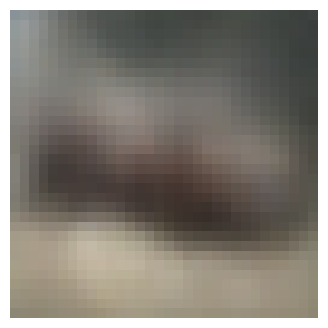

In [144]:
decoder = model.decoder
sample = vae_sample(decoder,1)
show_img(sample[0])